In [1]:
import rebound
import sys
#change the next line to reflect where you have downloaded the source code
#sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
sys.path.insert(0, '../src')
import sbdynt as sbd

In [2]:
#change this to point to the local copy
#training_file = '/Users/kvolk/Documents/GitHub/SBDynT/src/TNO-ML-training-data.csv'
training_file = '../src/TNO-ML-training-data.csv'

In [3]:
#read the training data and train the classifier
#return the accuracy score and testing results 
#(though current notebook doesn't do anything with those)
(clf, score, classes_train, classes_test, 
 features_train, features_test, 
 feature_names, classes_dictionary) = sbd.train_and_test_TNO_classifier(training_file)

In [2]:
#this just displays the resulting classifier info
clf

NameError: name 'clf' is not defined

In [5]:
print("the classifier has a strict accuracy of %f percent\n" % (100*score))

the classifier has a strict accuracy of 97.594163 percent



In [8]:
#runs an integration (files saved to whatever directory this notebook is run in, will fix later to add options for that)
#NOTE: if clones==2, then this will run a best-fit plus a 3-sigma high and 3-sigma low clone
#otherwise if clones !=2 it will run however many clones you want sampled from the covariance matrix as usual
#if you don't specify clones, then it will run the min/max case

#currentlt this is only set up to do TNOs in JPL's database, will update at some point to broaden that
import pandas as pd
import os
import sbdynt as sbd
data = pd.read_csv('../data/data_files/DEEP.csv')
classes = []

features=[]
#for i in range(len(data)):
for i in range(len(data)):
    if i%5==0:
        print()
    tno = data['Name'][i]
    clones = 2

    #new_features, short_simarchive_file, long_simarchive_file = sbd.run_TNO_integration_for_ML(tno=tno,clones=clones)

    sim_init = rebound.Simulation('../data/DEEP/'+str(tno)+'/archive_init.bin')
    new_features, short_simarchive_file, long_simarchive_file = sbd.read_TNO_integration_for_ML(sim_init=sim_init,clones=clones,tno=str(tno))

    #print(new_features)
    #features = features.append(new_features)
    predicted_classes = clf.predict(new_features)
    
    classes.append(predicted_classes)
    #class_probs = clf.predict_proba(new_features)

#the short archive file has the 0.5 Myr integration (at high cadence output) and the long has the 10 Myr integration (lower cadence output)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)



False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


In [43]:
import rebound
import sbdynt as sbd
tno = '2014 US277'
sim_init = rebound.Simulation('../data/Single/2014 US277/archive_init.bin')
clones=10
from datetime import datetime
begin = datetime.now()
new_features, short_simarchive_file, long_simarchive_file = sbd.read_TNO_integration_for_ML(sim_init=sim_init,
                                                                                            clones=10,tno=tno)
predicted_classes = clf.predict(new_features)
class_probs = clf.predict_proba(new_features)
sbd.print_TNO_ML_results(predicted_classes,classes_dictionary,class_probs,clones=clones)
print(datetime.now()-begin)

False


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


Clone number, most probable class, probability of most probable class, probability of class-det,probability of scattering,probability of Nresonant,
0, Nresonant, 9.999994e-01, 6.298621e-07, 1.757542e-10, 9.999994e-01, 
1, class-det, 8.755788e-01, 8.755788e-01, 7.388657e-08, 1.244211e-01, 
2, Nresonant, 1.000000e+00, 1.872023e-08, 1.536743e-11, 1.000000e+00, 
3, class-det, 7.712568e-01, 7.712568e-01, 7.039258e-08, 2.287432e-01, 
4, class-det, 9.999574e-01, 9.999574e-01, 1.878998e-09, 4.254961e-05, 
5, Nresonant, 1.000000e+00, 4.518862e-08, 3.317813e-11, 1.000000e+00, 
6, Nresonant, 5.866687e-01, 4.133313e-01, 6.989813e-08, 5.866687e-01, 
7, Nresonant, 1.000000e+00, 7.775230e-10, 2.728302e-12, 1.000000e+00, 
8, Nresonant, 1.000000e+00, 4.790644e-09, 4.705126e-12, 1.000000e+00, 
9, Nresonant, 8.904202e-01, 1.095797e-01, 6.510524e-08, 8.904202e-01, 
10, Nresonant, 1.000000e+00, 1.355384e-08, 1.002364e-11, 1.000000e+00, 
0:03:10.098196


In [44]:
#apply the classifier to these integrations
predicted_classes = clf.predict(new_features)
class_probs = clf.predict_proba(new_features)

print(new_features)


[[9.92902651e+01 1.25048969e-01 1.25942829e-03 ... 9.13480392e-01
  5.24715996e-01 3.13801453e+00]
 [9.96346643e+01 1.62331661e-02 1.62926891e-04 ... 8.14663951e-01
  1.00486224e+00 1.56595965e+00]
 [9.92838677e+01 1.01415940e-01 1.02147451e-03 ... 1.08324515e+00
  4.99862259e-01 1.39696169e+00]
 ...
 [9.92841773e+01 1.03673396e-01 1.04420865e-03 ... 1.14138287e+00
  5.20792079e-01 1.24375381e+00]
 [9.94695110e+01 3.32322656e-02 3.34094993e-04 ... 6.63841808e-01
  9.25890093e-01 1.54115773e+00]
 [9.92834806e+01 7.54919179e-02 7.60367359e-04 ... 1.28058008e+00
  9.58967174e-01 1.40270812e+00]]


In [45]:
#print out the results
sbd.print_TNO_ML_results(predicted_classes,classes_dictionary,class_probs,clones=clones)

Clone number, most probable class, probability of most probable class, probability of class-det,probability of scattering,probability of Nresonant,
0, Nresonant, 9.999994e-01, 6.298621e-07, 1.757542e-10, 9.999994e-01, 
1, class-det, 8.755788e-01, 8.755788e-01, 7.388657e-08, 1.244211e-01, 
2, Nresonant, 1.000000e+00, 1.872023e-08, 1.536743e-11, 1.000000e+00, 
3, class-det, 7.712568e-01, 7.712568e-01, 7.039258e-08, 2.287432e-01, 
4, class-det, 9.999574e-01, 9.999574e-01, 1.878998e-09, 4.254961e-05, 
5, Nresonant, 1.000000e+00, 4.518862e-08, 3.317813e-11, 1.000000e+00, 
6, Nresonant, 5.866687e-01, 4.133313e-01, 6.989813e-08, 5.866687e-01, 
7, Nresonant, 1.000000e+00, 7.775230e-10, 2.728302e-12, 1.000000e+00, 
8, Nresonant, 1.000000e+00, 4.790644e-09, 4.705126e-12, 1.000000e+00, 
9, Nresonant, 8.904202e-01, 1.095797e-01, 6.510524e-08, 8.904202e-01, 
10, Nresonant, 1.000000e+00, 1.355384e-08, 1.002364e-11, 1.000000e+00, 


In [47]:
#read the 10 Myr archive to make a plot as a check
(flag, a, e, inc, node, aperi, ma, t) = sbd.read_sa_for_sbody(
                            sbody=tno,
                            archivefile=long_simarchive_file,
                            nclones=clones)

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


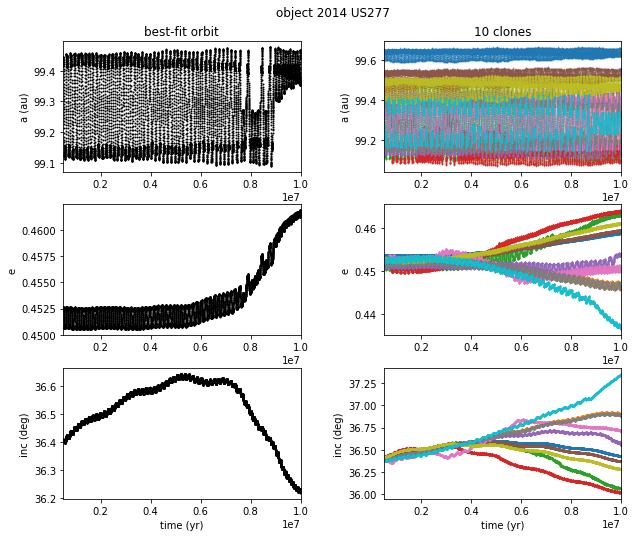

In [48]:
#default plotting function call
flag, fig1 = sbd.plot_aei(sbody=tno,
                          a=a,e=e,inc=inc,t=t,
                          nclones=clones,figfile=None)

In [20]:
import numpy as np
class_det = np.median(classes,axis=1)

class_df = pd.DataFrame(classes)
class_df.to_csv('../data/DEEP_classes.csv')
#np.savetxt('../data/DEEP_classes.csv',classes)
print(classes_dictionary)

{0: 'class-det', 1: 'scattering', 2: 'Nresonant'}


In [21]:
print(class_df)

     0  1  2
0    0  0  0
1    2  0  2
2    0  2  2
3    0  0  0
4    0  0  0
..  .. .. ..
105  0  0  0
106  0  0  0
107  0  0  0
108  0  0  0
109  0  0  0

[110 rows x 3 columns]


In [39]:
sim = rebound.Simulationarchive('../../../../../../hdd/haumea-data/djspenc/SBDynT_sims/TNOs_original/2013 GQ137/archive.bin')
print(len(sim[0].particles))
print(sim[-1].t)

6
100000000.0


In [31]:
print(str(type(64.4)) == "<class 'float'>")

True
